# Self-Organizing Map - Wine data

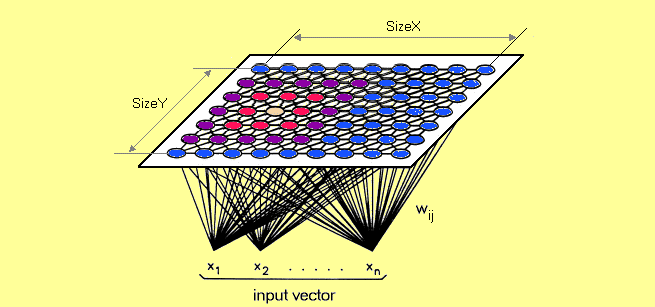

In [88]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import pcolor, colorbar, plot

In [101]:
vinhos = pd.read_csv('wines.csv')
vinhos.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [109]:
x = vinhos.iloc[:,1:].values
y = vinhos.iloc[:,0].values

In [110]:
normalizador = MinMaxScaler(feature_range=(0,1))
x = normalizador.fit_transform(x)

In [111]:
som = MiniSom(x=8, y=8, input_len=13, sigma=1.0, learning_rate=0.5, random_seed=2)
som.random_weights_init(x)
som.train_random(data=x, num_iteration=100)

In [112]:
som._weights
som._activation_map
q = som.activation_response(x)

In [113]:
y[y==1] = 0
y[y==2] = 1
y[y==3] = 2

markers = ['o', 'D', 's']
color=['r', 'g', 'b']

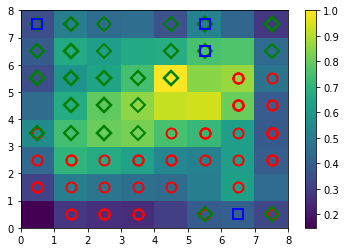

In [116]:
pcolor(som.distance_map().T)
colorbar()

for i, X in enumerate(x):
  w=som.winner(X)
  plot(w[0]+0.5, w[1]+0.5, markers[y[i]], markerfacecolor='None', markersize=10, markeredgecolor=color[y[i]], markeredgewidth=2)